<a href="https://colab.research.google.com/github/liadekel/analyzing-big-data/blob/master/HW_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework Assignment  6

In [1]:
!pip install turicreate
!pip install kaggle 
!pip install gensim
!pip install pyLDAvis
!pip install spaCy
!pip install afinn

In [2]:
#setting up Kaggle & TuriCreate package s
import json
import os

!mkdir /root/.kaggle/
# Installing the Kaggle package

#Important Note: complete this with your own key - after running this for the first time remmember to **remove** your API_KEY
api_token = {"username":"liaddekel","key":"bf0297555b2915c6c31a8f6579de9483"}

# creating kaggle.json file with the personal API-Key details 
# You can also put this file on your Google Drive

with open('/root/.kaggle/kaggle.json', 'w') as file:
  json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle/’: File exists


**Question 1:** Construct a sentiment classifier using 80% of the reviews in the [Amazon Fine Food Reviews dataset](https://www.kaggle.com/snap/amazon-fine-food-reviews).
The classifier needs to predict if a product got a one-star or a five-star review. 
Evaluate the classifier using the rest of the data (30pt). 


In [3]:
!mkdir ./datasets
!mkdir ./datasets/amazon

# download the dataset from Kaggle and unzip it
!kaggle datasets download snap/amazon-fine-food-reviews -p ./datasets/amazon
!unzip ./datasets/amazon/*.zip  -d ./datasets/amazon/
! ls -l ./datasets/amazon/

 99% 239M/242M [00:04<00:00, 102MB/s]
100% 242M/242M [00:04<00:00, 56.7MB/s]
Archive:  ./datasets/amazon/amazon-fine-food-reviews.zip
  inflating: ./datasets/amazon/Reviews.csv  
  inflating: ./datasets/amazon/database.sqlite  
  inflating: ./datasets/amazon/hashes.txt  
total 905856
-rw-r--r-- 1 root root 253873708 May 13 05:36 amazon-fine-food-reviews.zip
-rw-r--r-- 1 root root 372798464 Sep 19  2019 database.sqlite
-rw-r--r-- 1 root root       277 Sep 19  2019 hashes.txt
-rw-r--r-- 1 root root 300904694 Sep 19  2019 Reviews.csv


In [5]:
import turicreate as tc

sf = tc.SFrame.read_csv("./datasets/amazon/Reviews.csv")

Unexpected characters after last column. "B000GW46D4"
Parse failed at token ending at: 
	myself that tastes much better than this."
35360,B000GW46D4,^A1DPWQR4WSPXTM,Japri,0,0,2,1331424000,Very unsat
Successfully parsed 10 tokens: 
	0: 35359
	1: B000GW46D4
	2: A2Y4S4CNGKF21S
	3: H. Swanson
	4: 0
	5: 0
	6: 2
	7: 1332374400
	8: Very dry,  ... rumbly :",
	9: to the poi ... is."
35360

Unexpected characters after last column. "one of only a very few"
Parse failed at token ending at: 
	hile. This is a very rare hot sauce, one of only a very few,^ where the actual chile is the major ingredient.
Successfully parsed 10 tokens: 
	0: 74275
	1: B005B3HKPO
	2: A3OC6M21K4UAQ
	3: tw
	4: 2
	5: 5
	6: 2
	7: 1328486400
	8: whats with ... is smell??
	9: ummm can s ... mmended!.,

Unexpected characters after last column. "B000PMJLJO"
Parse failed at token ending at: 
	myself that tastes much better than this."
88623,B000PMJLJO,^A1DPWQR4WSPXTM,Japri,0,0,2,1331424000,Very unsat
Successfully parsed 10 tokens: 
	0: 88622
	1: B000PMJLJO
	2: A2Y4S4CNGKF21S
	3: H. Swanson
	4: 0
	5: 0
	6: 2
	7: 1332374400
	8: Very dry,  ... rumbly :",
	9: to the poi ... is."
88623

3 lines failed to parse correctly

Finished parsing file /content/datasets/amazon/Reviews.csv

Parsing completed. Parsed 100 lines in 1.07062 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,str,str,str,int,int,int,int,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Unexpected characters after last column. "B000GW46D4"
Parse failed at token ending at: 
	myself that tastes much better than this."
35360,B000GW46D4,^A1DPWQR4WSPXTM,Japri,0,0,2,1331424000,Very unsat
Successfully parsed 10 tokens: 
	0: 35359
	1: B000GW46D4
	2: A2Y4S4CNGKF21S
	3: H. Swanson
	4: 0
	5: 0
	6: 2
	7: 1332374400
	8: "Very dry, ... edibly dry
	9: to the poi ... is."
35360

Unexpected characters after last column. "one of only a very few"
Parse failed at token ending at: 
	hile. This is a very rare hot sauce, one of only a very few,^ where the actual chile is the major ingredient.
Successfully parsed 10 tokens: 
	0: 74275
	1: B005B3HKPO
	2: A3OC6M21K4UAQ
	3: tw
	4: 2
	5: 5
	6: 2
	7: 1328486400
	8: whats with ... is smell??
	9: "ummm can  ...  hot sauce

Unexpected characters after last column. "B000PMJLJO"
Parse failed at token ending at: 
	myself that tastes much better than this."
88623,B000PMJLJO,^A1DPWQR4WSPXTM,Japri,0,0,2,1331424000,Very unsat
Successfully parsed 10 tokens: 
	0: 88622
	1: B000PMJLJO
	2: A2Y4S4CNGKF21S
	3: H. Swanson
	4: 0
	5: 0
	6: 2
	7: 1332374400
	8: "Very dry, ... edibly dry
	9: to the poi ... is."
88623

Unexpected characters after last column. "but that awful after taste has no place in my afternoons.  Fog Chaser is flavorful but smooth. If you have had difficulty finding a good coffee for the new machines"
Parse failed at token ending at: 
	e had difficulty finding a good coffee for the new machines,^ do give this one a try."
181216,B007Y59HVM,#oc-
Successfully parsed 10 tokens: 
	0: 181213
	1: B007Y59HVM
	2: #oc-R3W5DW4JKJT228
	3: Mamaw
	4: 0
	5: 2
	6: 1
	7: 1346112000
	8: Disappointed
	9: "I regret  ... he morning

Read 71440 lines. Lines per second: 51967.1

Unexpected characters after last column. "0"
Parse failed at token ending at: 
	 />\"
190510,B0012UEHFQ,A2788LGTSGCFA6,"Mom of 3 ""sue""",0,^0,5,1329436800,She Loves Them!,I have a crazy do
Successfully parsed 10 tokens: 
	0: 190509
	1: B0012UEHFQ
	2: A3CR0UBHFX0NE7
	3: Sharee Lee Peterson
	4: 0
	5: 0
	6: 1
	7: 1330300800
	8: Poor Substitute
	9: I had prev ... of 3 "sue"

Unexpected characters after last column. "B000GW46DE"
Parse failed at token ending at: 
	yself that tastes much better than this."
201283,B000GW46DE,^A1DPWQR4WSPXTM,Japri,0,0,2,1331424000,Very unsat
Successfully parsed 10 tokens: 
	0: 201282
	1: B000GW46DE
	2: A2Y4S4CNGKF21S
	3: H. Swanson
	4: 0
	5: 0
	6: 2
	7: 1332374400
	8: "Very dry, ... edibly dry
	9: to the poi ... s."
201283

Unexpected characters after last column. "B000PMC7GI"
Parse failed at token ending at: 
	yself that tastes much better than this."
353089,B000PMC7GI,^A1DPWQR4WSPXTM,Japri,0,0,2,1331424000,Very unsat
Successfully parsed 10 tokens: 
	0: 353088
	1: B000PMC7GI
	2: A2Y4S4CNGKF21S
	3: H. Swanson
	4: 0
	5: 0
	6: 2
	7: 1332374400
	8: "Very dry, ... edibly dry
	9: to the poi ... s."
353089

Unexpected characters after last column. "give it a try.  After drinking half of a bottle"
Parse failed at token ending at: 
	ou haven't, give it a try.  After drinking half of a bottle,^ you will know it's good stuff."
434576,B001SB1B
Successfully parsed 10 tokens: 
	0: 434574
	1: B002DHMX3A
	2: A2XNJJ9TF70P4J
	3: Angie
	4: 1
	5: 1
	6: 1
	7: 1307232000
	8: How did th ... s this up?
	9: "The cerea ... ou haven't

8 lines failed to parse correctly

Finished parsing file /content/datasets/amazon/Reviews.csv

Parsing completed. Parsed 260995 lines in 3.60999 secs.

In [6]:
# remove reviews with scores different from 1 or 5
sf = sf[(sf['Score'] == 5) | (sf['Score'] == 1)]
# convert to sentiments
def label2sentiment(label):
    if label == 5:
        return "Positive"
    else:
        return "Negative"

sf['sentiment'] = sf['Score'].apply(lambda label: label2sentiment(label))
sf

Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score
1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5
2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1
5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M.Wassir"" ...",0,0,5
7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5
8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5
9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5
10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5
11,B0001PB9FE,A3HDKO7OW0QNK4,Canadian Fan,1,1,5
12,B0009XLVG0,A2725IB4YY9JEB,"A Poeng ""SparkyGoHome""",4,4,5
13,B0009XLVG0,A327PCT23YH90,LT,1,1,1


In [0]:
# calculate 1-ngrams and 2-ngrams
sf['words_1grams'] = tc.text_analytics.count_ngrams(sf['Summary'], n=1, method='word')
sf['words_2grams'] = tc.text_analytics.count_ngrams(sf['Summary'], n=2, method='word')

In [8]:
train, test = sf.random_split(0.8)
cls = tc.classifier.create(train,features=['words_1grams', 'words_2grams'], target="sentiment")

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.

PROGRESS: The following methods are available for this type of problem.
PROGRESS: LogisticClassifier, SVMClassifier
PROGRESS: The returned model will be chosen according to validation accuracy.


Logistic regression:

--------------------------------------------------------

Number of examples          : 145083

Number of classes           : 2

Number of feature columns   : 2

Number of unpacked features : 133722

Number of coefficients      : 133723

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 2        | 1.000000  | 1.231741     | 0.931853          | 0.908460            |

| 1         | 4        | 1.000000  | 1.534260     | 0.981163          | 0.947617            |

| 2         | 5        | 1.000000  | 1.734036     | 0.990805          | 0.957046            |

| 3         | 6        | 1.000000  | 1.929687     | 0.993742          | 0.962546            |

| 4         | 7        | 1.000000  | 2.136399     | 0.994582          | 0.962022            |

| 9         | 12       | 1.000000  | 3.124435     | 0.996126          | 0.959141            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

SVM:

--------------------------------------------------------

Number of examples          : 145083

Number of classes           : 2

Number of feature columns   : 2

Number of unpacked features : 133722

Number of coefficients    : 133723

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 2        | 1.000000  | 0.242748     | 0.931853          | 0.908460            |

| 1         | 4        | 1.000000  | 0.525651     | 0.973911          | 0.940021            |

| 2         | 5        | 1.000000  | 0.712548     | 0.989434          | 0.957438            |

| 3         | 6        | 1.000000  | 0.894118     | 0.992632          | 0.960581            |

| 4         | 7        | 1.000000  | 1.078647     | 0.993948          | 0.961498            |

| 9         | 12       | 1.000000  | 1.993828     | 0.995575          | 0.960712            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

PROGRESS: Model selection based on validation accuracy:
PROGRESS: ---------------------------------------------
PROGRESS: LogisticClassifier              : 0.9591409114719749
PROGRESS: SVMClassifier                   : 0.9607124148768988
PROGRESS: ---------------------------------------------
PROGRESS: Selecting SVMClassifier based on validation set performance.


In [9]:
cls.evaluate(test)

{'accuracy': 0.9624505411000184, 'confusion_matrix': Columns:
 	target_label	str
 	predicted_label	str
 	count	int
 
 Rows: 4
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |   Positive   |     Negative    |  425  |
 |   Negative   |     Positive    |  1008 |
 |   Positive   |     Positive    | 32996 |
 |   Negative   |     Negative    |  3734 |
 +--------------+-----------------+-------+
 [4 rows x 3 columns], 'f1_score': 0.9787467556544309, 'precision': 0.9703564286554524, 'recall': 0.9872834445408576}

**Question 2:** Construct a sentiment classifier using features from the [TextBlob package](https://textblob.readthedocs.io/en/dev/index.html),
    and from the [affin package](https://pypi.org/project/afinn/). Compare the two classifiers results and visualize it (however you want) (20pt)

In [10]:
from afinn import Afinn
afinn = Afinn()

sf = tc.SFrame.read_csv("./datasets/amazon/Reviews.csv")

# remove reviews with scores different from 1 or 5
sf = sf[(sf['Score'] == 5) | (sf['Score'] == 1)]

# convert to sentiments
def label2sentiment(label):
    if label == 5:
        return "Positive"
    else:
        return "Negative"

sf['sentiment'] = sf['Score'].apply(lambda label: label2sentiment(label))

# add affin score column
sf['afinn_score'] = sf['Summary'].apply(lambda t: afinn.score(t))

train_affin, test_affin = sf.random_split(0.8)

Unexpected characters after last column. "B000GW46D4"
Parse failed at token ending at: 
	myself that tastes much better than this."
35360,B000GW46D4,^A1DPWQR4WSPXTM,Japri,0,0,2,1331424000,Very unsat
Successfully parsed 10 tokens: 
	0: 35359
	1: B000GW46D4
	2: A2Y4S4CNGKF21S
	3: H. Swanson
	4: 0
	5: 0
	6: 2
	7: 1332374400
	8: Very dry,  ... rumbly :",
	9: to the poi ... is."
35360

Unexpected characters after last column. "one of only a very few"
Parse failed at token ending at: 
	hile. This is a very rare hot sauce, one of only a very few,^ where the actual chile is the major ingredient.
Successfully parsed 10 tokens: 
	0: 74275
	1: B005B3HKPO
	2: A3OC6M21K4UAQ
	3: tw
	4: 2
	5: 5
	6: 2
	7: 1328486400
	8: whats with ... is smell??
	9: ummm can s ... mmended!.,

Unexpected characters after last column. "B000PMJLJO"
Parse failed at token ending at: 
	myself that tastes much better than this."
88623,B000PMJLJO,^A1DPWQR4WSPXTM,Japri,0,0,2,1331424000,Very unsat
Successfully parsed 10 tokens: 
	0: 88622
	1: B000PMJLJO
	2: A2Y4S4CNGKF21S
	3: H. Swanson
	4: 0
	5: 0
	6: 2
	7: 1332374400
	8: Very dry,  ... rumbly :",
	9: to the poi ... is."
88623

3 lines failed to parse correctly

Finished parsing file /content/datasets/amazon/Reviews.csv

Parsing completed. Parsed 100 lines in 1.08856 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,str,str,str,int,int,int,int,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Unexpected characters after last column. "B000GW46D4"
Parse failed at token ending at: 
	myself that tastes much better than this."
35360,B000GW46D4,^A1DPWQR4WSPXTM,Japri,0,0,2,1331424000,Very unsat
Successfully parsed 10 tokens: 
	0: 35359
	1: B000GW46D4
	2: A2Y4S4CNGKF21S
	3: H. Swanson
	4: 0
	5: 0
	6: 2
	7: 1332374400
	8: "Very dry, ... edibly dry
	9: to the poi ... is."
35360

Unexpected characters after last column. "one of only a very few"
Parse failed at token ending at: 
	hile. This is a very rare hot sauce, one of only a very few,^ where the actual chile is the major ingredient.
Successfully parsed 10 tokens: 
	0: 74275
	1: B005B3HKPO
	2: A3OC6M21K4UAQ
	3: tw
	4: 2
	5: 5
	6: 2
	7: 1328486400
	8: whats with ... is smell??
	9: "ummm can  ...  hot sauce

Unexpected characters after last column. "B000PMJLJO"
Parse failed at token ending at: 
	myself that tastes much better than this."
88623,B000PMJLJO,^A1DPWQR4WSPXTM,Japri,0,0,2,1331424000,Very unsat
Successfully parsed 10 tokens: 
	0: 88622
	1: B000PMJLJO
	2: A2Y4S4CNGKF21S
	3: H. Swanson
	4: 0
	5: 0
	6: 2
	7: 1332374400
	8: "Very dry, ... edibly dry
	9: to the poi ... is."
88623

Unexpected characters after last column. "but that awful after taste has no place in my afternoons.  Fog Chaser is flavorful but smooth. If you have had difficulty finding a good coffee for the new machines"
Parse failed at token ending at: 
	e had difficulty finding a good coffee for the new machines,^ do give this one a try."
181216,B007Y59HVM,#oc-
Successfully parsed 10 tokens: 
	0: 181213
	1: B007Y59HVM
	2: #oc-R3W5DW4JKJT228
	3: Mamaw
	4: 0
	5: 2
	6: 1
	7: 1346112000
	8: Disappointed
	9: "I regret  ... he morning

Read 71440 lines. Lines per second: 51746.2

Unexpected characters after last column. "0"
Parse failed at token ending at: 
	 />\"
190510,B0012UEHFQ,A2788LGTSGCFA6,"Mom of 3 ""sue""",0,^0,5,1329436800,She Loves Them!,I have a crazy do
Successfully parsed 10 tokens: 
	0: 190509
	1: B0012UEHFQ
	2: A3CR0UBHFX0NE7
	3: Sharee Lee Peterson
	4: 0
	5: 0
	6: 1
	7: 1330300800
	8: Poor Substitute
	9: I had prev ... of 3 "sue"

Unexpected characters after last column. "B000GW46DE"
Parse failed at token ending at: 
	yself that tastes much better than this."
201283,B000GW46DE,^A1DPWQR4WSPXTM,Japri,0,0,2,1331424000,Very unsat
Successfully parsed 10 tokens: 
	0: 201282
	1: B000GW46DE
	2: A2Y4S4CNGKF21S
	3: H. Swanson
	4: 0
	5: 0
	6: 2
	7: 1332374400
	8: "Very dry, ... edibly dry
	9: to the poi ... s."
201283

Unexpected characters after last column. "B000PMC7GI"
Parse failed at token ending at: 
	yself that tastes much better than this."
353089,B000PMC7GI,^A1DPWQR4WSPXTM,Japri,0,0,2,1331424000,Very unsat
Successfully parsed 10 tokens: 
	0: 353088
	1: B000PMC7GI
	2: A2Y4S4CNGKF21S
	3: H. Swanson
	4: 0
	5: 0
	6: 2
	7: 1332374400
	8: "Very dry, ... edibly dry
	9: to the poi ... s."
353089

Unexpected characters after last column. "give it a try.  After drinking half of a bottle"
Parse failed at token ending at: 
	ou haven't, give it a try.  After drinking half of a bottle,^ you will know it's good stuff."
434576,B001SB1B
Successfully parsed 10 tokens: 
	0: 434574
	1: B002DHMX3A
	2: A2XNJJ9TF70P4J
	3: Angie
	4: 1
	5: 1
	6: 1
	7: 1307232000
	8: How did th ... s this up?
	9: "The cerea ... ou haven't

8 lines failed to parse correctly

Finished parsing file /content/datasets/amazon/Reviews.csv

Parsing completed. Parsed 260995 lines in 3.51836 secs.

In [11]:
cls_affin = tc.boosted_trees_classifier.create(train_affin,features=['afinn_score'], target="sentiment")

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 144618

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 1

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.049378     | 0.902972          | 0.904756            | 0.517123          | 0.515980            |

| 2         | 0.098422     | 0.902972          | 0.904756            | 0.422078          | 0.420004            |

| 3         | 0.148247     | 0.902972          | 0.904756            | 0.364944          | 0.362093            |

| 4         | 0.201125     | 0.902972          | 0.904756            | 0.328926          | 0.325406            |

| 5         | 0.256724     | 0.902972          | 0.904756            | 0.305641          | 0.301543            |

| 10        | 0.501450     | 0.902972          | 0.904756            | 0.266545          | 0.260544            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

In [12]:
ev_affin = cls_affin.evaluate(test_affin)
print(ev_affin)

{'accuracy': 0.9016609748525303, 'auc': 0.8424890307345122, 'confusion_matrix': Columns:
	target_label	str
	predicted_label	str
	count	int

Rows: 4

Data:
+--------------+-----------------+-------+
| target_label | predicted_label | count |
+--------------+-----------------+-------+
|   Negative   |     Negative    |  1452 |
|   Positive   |     Negative    |  450  |
|   Negative   |     Positive    |  3351 |
|   Positive   |     Positive    | 33399 |
+--------------+-----------------+-------+
[4 rows x 3 columns]
, 'f1_score': 0.94616071049165, 'log_loss': 0.269229808636381, 'precision': 0.9088163265306123, 'recall': 0.986705663387397, 'roc_curve': Columns:
	threshold	float
	fpr	float
	tpr	float
	p	int
	n	int

Rows: 100001

Data:
+-----------+-----+-----+-------+------+
| threshold | fpr | tpr |   p   |  n   |
+-----------+-----+-----+-------+------+
|    0.0    | 1.0 | 1.0 | 33849 | 4803 |
|   1e-05   | 1.0 | 1.0 | 33849 | 4803 |
|   2e-05   | 1.0 | 1.0 | 33849 | 4803 |
|   3e-05   |

In [19]:
!pip install -U textblob
!python -m textblob.download_corpora

Requirement already up-to-date: textblob in /usr/local/lib/python3.6/dist-packages (0.15.3)
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [33]:
from textblob import TextBlob

# add word_count column
sf['word_count'] = sf['Summary'].apply(lambda t: len(TextBlob(t).words))
# add setntiments columns
sf['polar'] = sf['Summary'].apply(lambda t: TextBlob(t).sentiment.polarity)
sf['subj'] = sf['Summary'].apply(lambda t: TextBlob(t).sentiment.subjectivity)
sf

Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score
1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5
2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1
5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M.Wassir"" ...",0,0,5
7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5
8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5
9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5
10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5
11,B0001PB9FE,A3HDKO7OW0QNK4,Canadian Fan,1,1,5
12,B0009XLVG0,A2725IB4YY9JEB,"A Poeng ""SparkyGoHome""",4,4,5
13,B0009XLVG0,A327PCT23YH90,LT,1,1,1


In [36]:
textblob_train, textblob_test = sf.random_split(0.8)
cls_textblob = tc.boosted_trees_classifier.create(textblob_train,features=['subj', 'polar', 'word_count'], target="sentiment")

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 145186

Number of classes           : 2

Number of feature columns   : 3

Number of unpacked features : 3

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.086370     | 0.903992          | 0.904083            | 0.516121          | 0.515780            |

| 2         | 0.162201     | 0.904316          | 0.904606            | 0.420234          | 0.419217            |

| 3         | 0.237877     | 0.904474          | 0.905391            | 0.362218          | 0.360675            |

| 4         | 0.316723     | 0.904426          | 0.904999            | 0.325389          | 0.323413            |

| 5         | 0.398442     | 0.904991          | 0.905522            | 0.301156          | 0.298701            |

| 10        | 0.796503     | 0.905404          | 0.906176            | 0.257226          | 0.254186            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

In [37]:
ev_textblob = cls_textblob.evaluate(textblob_test)
print(ev_textblob)

{'accuracy': 0.9040573921269774, 'auc': 0.8578329016503534, 'confusion_matrix': Columns:
	target_label	str
	predicted_label	str
	count	int

Rows: 4

Data:
+--------------+-----------------+-------+
| target_label | predicted_label | count |
+--------------+-----------------+-------+
|   Positive   |     Negative    |  331  |
|   Negative   |     Negative    |  1348 |
|   Positive   |     Positive    | 33055 |
|   Negative   |     Positive    |  3320 |
+--------------+-----------------+-------+
[4 rows x 3 columns]
, 'f1_score': 0.9476641676581471, 'log_loss': 0.26014776023957537, 'precision': 0.9087285223367697, 'recall': 0.9900856646498533, 'roc_curve': Columns:
	threshold	float
	fpr	float
	tpr	float
	p	int
	n	int

Rows: 100001

Data:
+-----------+-----+-----+-------+------+
| threshold | fpr | tpr |   p   |  n   |
+-----------+-----+-----+-------+------+
|    0.0    | 1.0 | 1.0 | 33386 | 4668 |
|   1e-05   | 1.0 | 1.0 | 33386 | 4668 |
|   2e-05   | 1.0 | 1.0 | 33386 | 4668 |
|   3e-0

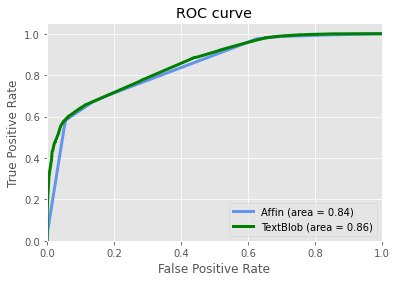

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

# we will compare the two classifiers by their roc curve.
# as we already saw from the eval report, the classifer *without* affin yielded 
# better score.
plt.style.use('ggplot')
plt.plot(ev_affin['roc_curve']['fpr'],
         ev_affin['roc_curve']['tpr'],
         color ='cornflowerblue',
         label='Affin (area = %0.2f)' %ev_affin['auc'], linewidth=3)
plt.plot(ev_textblob['roc_curve']['fpr'],
         ev_textblob['roc_curve']['tpr'],
         color='green',
         label='TextBlob (area = %0.2f)' %ev_textblob['auc'],linewidth=3)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('ROC curve')
plt.show()

**Question 3:**  Select a different reviews dataset and create a sentiment classifier which utilizes word embeddings (25pt).
Evaluate this classifier (5pt). Try to improve your classifier by adding additional features (20pt)

In [0]:
!mkdir ./datasets/hotels

# download the dataset from Kaggle and unzip it
!kaggle datasets download datafiniti/hotel-reviews -p ./datasets/hotels
!unzip ./datasets/hotels/*.zip  -d ./datasets/hotels
! ls -l ./datasets/hotels

  0% 0.00/13.1M [00:00<?, ?B/s]
100% 13.1M/13.1M [00:00<00:00, 121MB/s]
Archive:  ./datasets/hotels/hotel-reviews.zip
  inflating: ./datasets/hotels/7282_1.csv  
  inflating: ./datasets/hotels/Datafiniti_Hotel_Reviews.csv  
  inflating: ./datasets/hotels/Datafiniti_Hotel_Reviews_Jun19.csv  
total 199488
-rw-r--r-- 1 root root  16548391 Sep 20  2019 7282_1.csv
-rw-r--r-- 1 root root  49564735 Sep 20  2019 Datafiniti_Hotel_Reviews.csv
-rw-r--r-- 1 root root 124452060 Sep 20  2019 Datafiniti_Hotel_Reviews_Jun19.csv
-rw-r--r-- 1 root root  13705194 May 12 18:05 hotel-reviews.zip


In [0]:
import spacy
!python -m spacy download en_core_web_lg # Important! you need to restart runtime after install
nlp = spacy.load('en_core_web_lg')

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [0]:
import turicreate as tc

sf = tc.SFrame.read_csv("./datasets/hotels/Datafiniti_Hotel_Reviews_Jun19.csv")

sf = sf[(sf['reviews.rating'] <=1) | (sf['reviews.rating'] >= 5)]

def points2sentiment(points):
    if points >= 5:
        return "Positive"
    else:
        return "Negative"

sf['sentiment'] = sf['reviews.rating'].apply(lambda points: points2sentiment(points))

Finished parsing file /content/datasets/hotels/Datafiniti_Hotel_Reviews_Jun19.csv

Parsing completed. Parsed 100 lines in 1.01452 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,str,str,str,str,str,str,str,float,float,str,int,str,str,str,str,int,str,str,str,str,str,str,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Read 4219 lines. Lines per second: 3456.21

Finished parsing file /content/datasets/hotels/Datafiniti_Hotel_Reviews_Jun19.csv

Parsing completed. Parsed 10000 lines in 1.51749 secs.

In [0]:
from tqdm import tqdm

l = []
for i in tqdm(range(len(sf))):
    text = sf[i]["reviews.text"]
    l.append(nlp(text).vector)
sf['vector'] = l 


100%|██████████| 5407/5407 [02:16<00:00, 39.64it/s]


In [0]:
train, test  = sf.random_split(0.8)
cls1 = tc.random_forest_classifier.create(train,features=['vector'], target="sentiment", max_iterations=100)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Random forest classifier:

--------------------------------------------------------

Number of examples          : 4105

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 300

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.102086     | 0.969793          | 0.940092            | 0.190450          | 0.234855            |

| 2         | 0.194867     | 0.970767          | 0.940092            | 0.183164          | 0.225499            |

| 3         | 0.287774     | 0.980755          | 0.953917            | 0.179645          | 0.225836            |

| 4         | 0.384264     | 0.978076          | 0.944700            | 0.180382          | 0.228930            |

| 5         | 0.480916     | 0.981242          | 0.949309            | 0.180282          | 0.228087            |

| 10        | 0.957188     | 0.982460          | 0.949309            | 0.177929          | 0.222528            |

| 50        | 4.600140     | 0.983678          | 0.953917            | 0.177062          | 0.224570            |

| 100       | 9.155758     | 0.983435          | 0.953917            | 0.176556          | 0.225889            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

In [0]:
ev1 = cls1.evaluate(test)
print(ev1)

{'accuracy': 0.9511520737327189, 'auc': 0.9647246804326453, 'confusion_matrix': Columns:
	target_label	str
	predicted_label	str
	count	int

Rows: 4

Data:
+--------------+-----------------+-------+
| target_label | predicted_label | count |
+--------------+-----------------+-------+
|   Positive   |     Negative    |   13  |
|   Positive   |     Positive    |  959  |
|   Negative   |     Negative    |   73  |
|   Negative   |     Positive    |   40  |
+--------------+-----------------+-------+
[4 rows x 3 columns]
, 'f1_score': 0.9731100963977677, 'log_loss': 0.22367863289176693, 'precision': 0.95995995995996, 'recall': 0.9866255144032922, 'roc_curve': Columns:
	threshold	float
	fpr	float
	tpr	float
	p	int
	n	int

Rows: 100001

Data:
+-----------+-----+-----+-----+-----+
| threshold | fpr | tpr |  p  |  n  |
+-----------+-----+-----+-----+-----+
|    0.0    | 1.0 | 1.0 | 972 | 113 |
|   1e-05   | 1.0 | 1.0 | 972 | 113 |
|   2e-05   | 1.0 | 1.0 | 972 | 113 |
|   3e-05   | 1.0 | 1.0 | 97

In [0]:
# we will improve by adding n-grams features
sf['1grams'] = tc.text_analytics.count_ngrams(sf['reviews.text'], n=1, method='word')
sf['2grams'] = tc.text_analytics.count_ngrams(sf['reviews.text'], n=2, method='word')
sf['3grams'] = tc.text_analytics.count_ngrams(sf['reviews.text'], n=3, method='word')
train, test  = sf.random_split(0.8)

In [0]:
cls2 = tc.random_forest_classifier.create(train,features=['1grams', '2grams','vector'], target="sentiment", max_iterations=100)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Random forest classifier:

--------------------------------------------------------

Number of examples          : 4116

Number of classes           : 2

Number of feature columns   : 3

Number of unpacked features : 140716

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.227535     | 0.969145          | 0.940092            | 0.195572          | 0.236648            |

| 2         | 0.459017     | 0.970603          | 0.944700            | 0.183200          | 0.231527            |

| 3         | 0.688792     | 0.977162          | 0.935484            | 0.182518          | 0.237445            |

| 4         | 0.919010     | 0.977648          | 0.944700            | 0.180793          | 0.233277            |

| 5         | 1.141055     | 0.980321          | 0.949309            | 0.180377          | 0.227930            |

| 10        | 2.236310     | 0.978620          | 0.949309            | 0.180372          | 0.224049            |

| 25        | 5.402526     | 0.978620          | 0.949309            | 0.180482          | 0.224306            |

| 50        | 10.791805    | 0.978620          | 0.949309            | 0.179045          | 0.221852            |

| 75        | 16.271539    | 0.979835          | 0.949309            | 0.179304          | 0.221512            |

| 100       | 21.759154    | 0.980321          | 0.940092            | 0.178995          | 0.222079            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

In [0]:
ev2 = cls2.evaluate(test)
print(ev2)

{'accuracy': 0.9534450651769087, 'auc': 0.9799054867848782, 'confusion_matrix': Columns:
	target_label	str
	predicted_label	str
	count	int

Rows: 4

Data:
+--------------+-----------------+-------+
| target_label | predicted_label | count |
+--------------+-----------------+-------+
|   Positive   |     Negative    |   12  |
|   Negative   |     Negative    |   60  |
|   Negative   |     Positive    |   38  |
|   Positive   |     Positive    |  964  |
+--------------+-----------------+-------+
[4 rows x 3 columns]
, 'f1_score': 0.974721941354904, 'log_loss': 0.21262376497638358, 'precision': 0.9620758483033932, 'recall': 0.9877049180327869, 'roc_curve': Columns:
	threshold	float
	fpr	float
	tpr	float
	p	int
	n	int

Rows: 100001

Data:
+-----------+-----+-----+-----+----+
| threshold | fpr | tpr |  p  | n  |
+-----------+-----+-----+-----+----+
|    0.0    | 1.0 | 1.0 | 976 | 98 |
|   1e-05   | 1.0 | 1.0 | 976 | 98 |
|   2e-05   | 1.0 | 1.0 | 976 | 98 |
|   3e-05   | 1.0 | 1.0 | 976 | 9

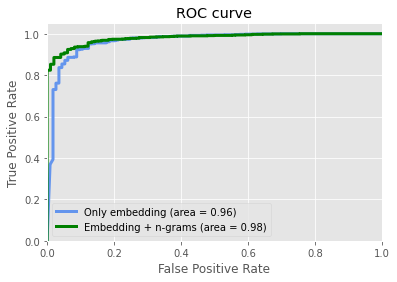

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

# we will compare the two classifiers by their roc curve.
# as we already saw from the eval report, the classifer *without* affin yielded 
# better score.
plt.style.use('ggplot')
plt.plot(ev1['roc_curve']['fpr'],
         ev1['roc_curve']['tpr'],
         color ='cornflowerblue',
         label='Only embedding (area = %0.2f)' %ev1['auc'], linewidth=3)
plt.plot(ev2['roc_curve']['fpr'],
         ev2['roc_curve']['tpr'],
         color='green',
         label='Embedding + n-grams (area = %0.2f)' %ev2['auc'],linewidth=3)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('ROC curve')
plt.show()